In [27]:
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [28]:
df = pd.read_csv(r"C:\Users\91877\Downloads\archive (6)\dementia_patients_health_data.csv")

In [29]:
df.head(1000)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,Donepezil,10.0,88,...,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,NaN,NaN,80,...,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,NaN,NaN,67,...,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,Memantine,20.0,62,...,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,NaN,1


In [30]:
print(df.describe())

          Diabetic  AlcoholLevel    HeartRate  BloodOxygenLevel  \
count  1000.000000   1000.000000  1000.000000       1000.000000   
mean      0.513000      0.098429    79.383000         95.226051   
std       0.500081      0.058715    12.107556          2.929262   
min       0.000000      0.000414    60.000000         90.010677   
25%       0.000000      0.045505    68.000000         92.875017   
50%       1.000000      0.098235    79.000000         95.390420   
75%       1.000000      0.151840    90.000000         97.785111   
max       1.000000      0.199866   100.000000         99.999230   

       BodyTemperature       Weight    MRI_Delay  Dosage in mg          Age  \
count      1000.000000  1000.000000  1000.000000    485.000000  1000.000000   
mean         36.761513    74.321326    30.103568      9.213402    74.908000   
std           0.431701    14.463765    16.862170      6.493188     9.095068   
min          36.002108    50.069731     0.094684      1.500000    60.000000   
2

In [31]:
df.dtypes

Diabetic                       int64
AlcoholLevel                 float64
HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
MRI_Delay                    float64
Prescription                  object
Dosage in mg                 float64
Age                            int64
Education_Level               object
Dominant_Hand                 object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Medication_History            object
Nutrition_Diet                object
Sleep_Quality                 object
Chronic_Health_Conditions     object
Dementia                       int64
dtype: object

In [32]:
df.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

REMOVING ALL THE NULL VALUES

In [33]:
PrescriptionMissValue = df['Prescription'].mode()[0]
df['Prescription'].fillna(PrescriptionMissValue, inplace=True)
DosageinmgMissValues=df['Dosage in mg'].mean()
df['Dosage in mg'].fillna(DosageinmgMissValues, inplace=True)
ChronicMissValue = df['Chronic_Health_Conditions'].mode()[0]
df['Chronic_Health_Conditions'].fillna(PrescriptionMissValue, inplace=True)

C:\Users\91877\AppData\Local\Temp\ipykernel_36744\2133250338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Prescription'].fillna(PrescriptionMissValue, inplace=True)
C:\Users\91877\AppData\Local\Temp\ipykernel_36744\2133250338.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [34]:
df.isnull().sum()

Diabetic                     0
AlcoholLevel                 0
HeartRate                    0
BloodOxygenLevel             0
BodyTemperature              0
Weight                       0
MRI_Delay                    0
Prescription                 0
Dosage in mg                 0
Age                          0
Education_Level              0
Dominant_Hand                0
Gender                       0
Family_History               0
Smoking_Status               0
APOE_ε4                      0
Physical_Activity            0
Depression_Status            0
Cognitive_Test_Scores        0
Medication_History           0
Nutrition_Diet               0
Sleep_Quality                0
Chronic_Health_Conditions    0
Dementia                     0
dtype: int64

C:\Users\91877\AppData\Local\Temp\ipykernel_36744\2053406263.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetic', data=df, palette=['black', 'red'])


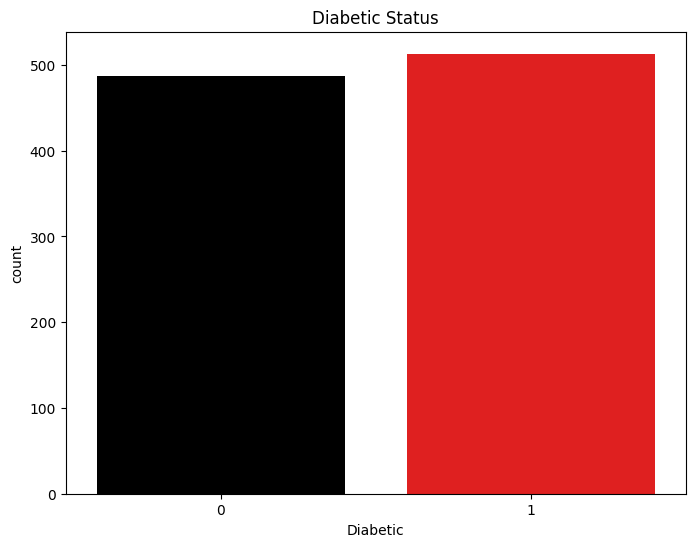

In [35]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar plot for 'Diabetic'
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetic', data=df, palette=['black', 'red'])
plt.title('Diabetic Status')
plt.show()


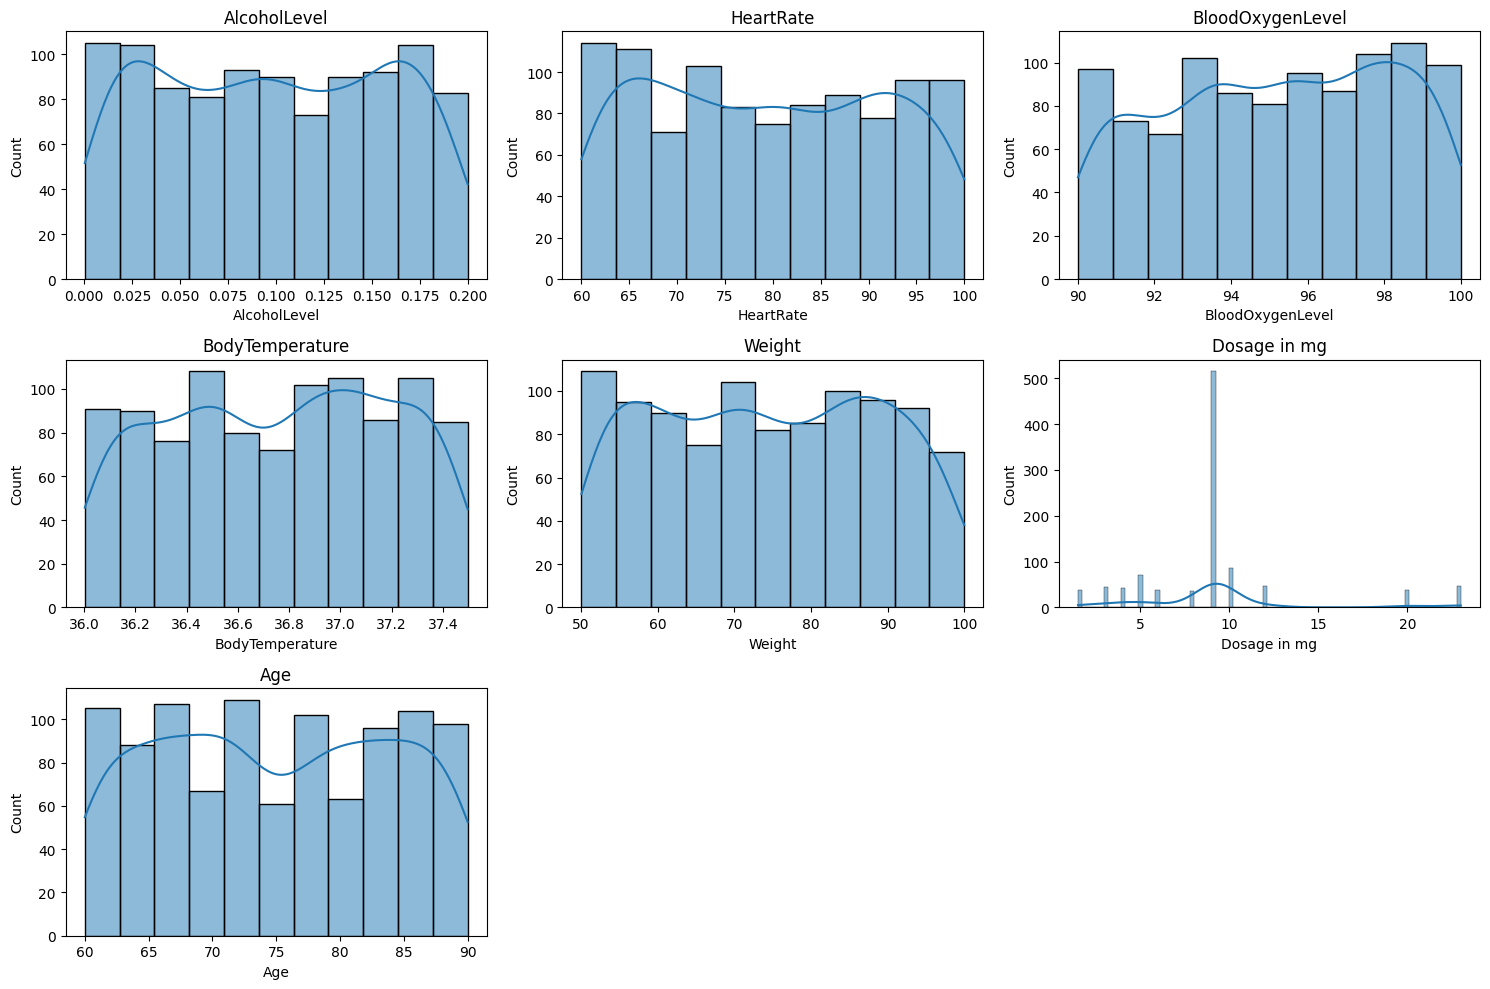

In [36]:
# 2. Histograms for continuous variables
continuous_vars = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'Dosage in mg', 'Age']
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()

# 3. Box plot for 'MRI_Delay'

C:\Users\91877\AppData\Local\Temp\ipykernel_36744\4160112673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MRI_Delay', data=df,palette=['#232b2b','#dc3d24'])
C:\Users\91877\AppData\Local\Temp\ipykernel_36744\4160112673.py:3: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x='MRI_Delay', data=df,palette=['#232b2b','#dc3d24'])


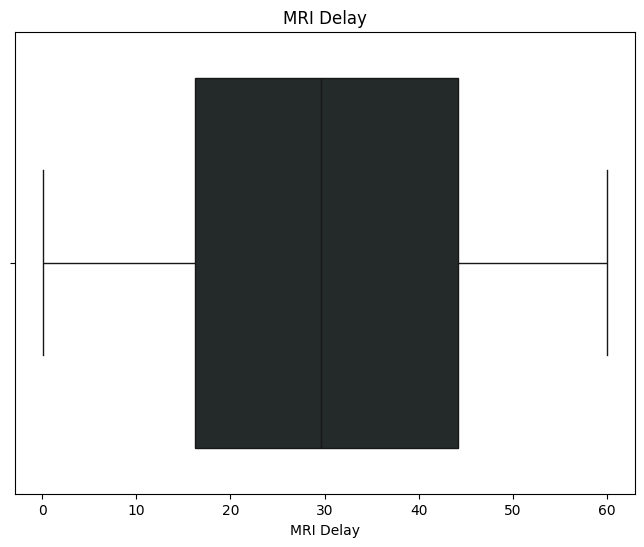

In [37]:
# 3. Box plot for 'MRI_Delay'
plt.figure(figsize=(8, 6))
sns.boxplot(x='MRI_Delay', data=df,palette=['#232b2b','#dc3d24'])
plt.title('MRI Delay')
plt.xlabel('MRI Delay')
plt.show()

# 4. Bar plots for categorical variables

C:\Users\91877\AppData\Local\Temp\ipykernel_36744\140683138.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df,palette=['#232b2b','#dc3d24'])
C:\Users\91877\AppData\Local\Temp\ipykernel_36744\140683138.py:6: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=var, data=df,palette=['#232b2b','#dc3d24'])
C:\Users\91877\AppData\Local\Temp\ipykernel_36744\140683138.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df,palette=['#232b2b','#dc3d24'])
C:\Users\91877\AppData\Local\Temp\ipykernel_36744\140683138.py:6: FutureWarning: 

Passing `palette` without assigning `hue

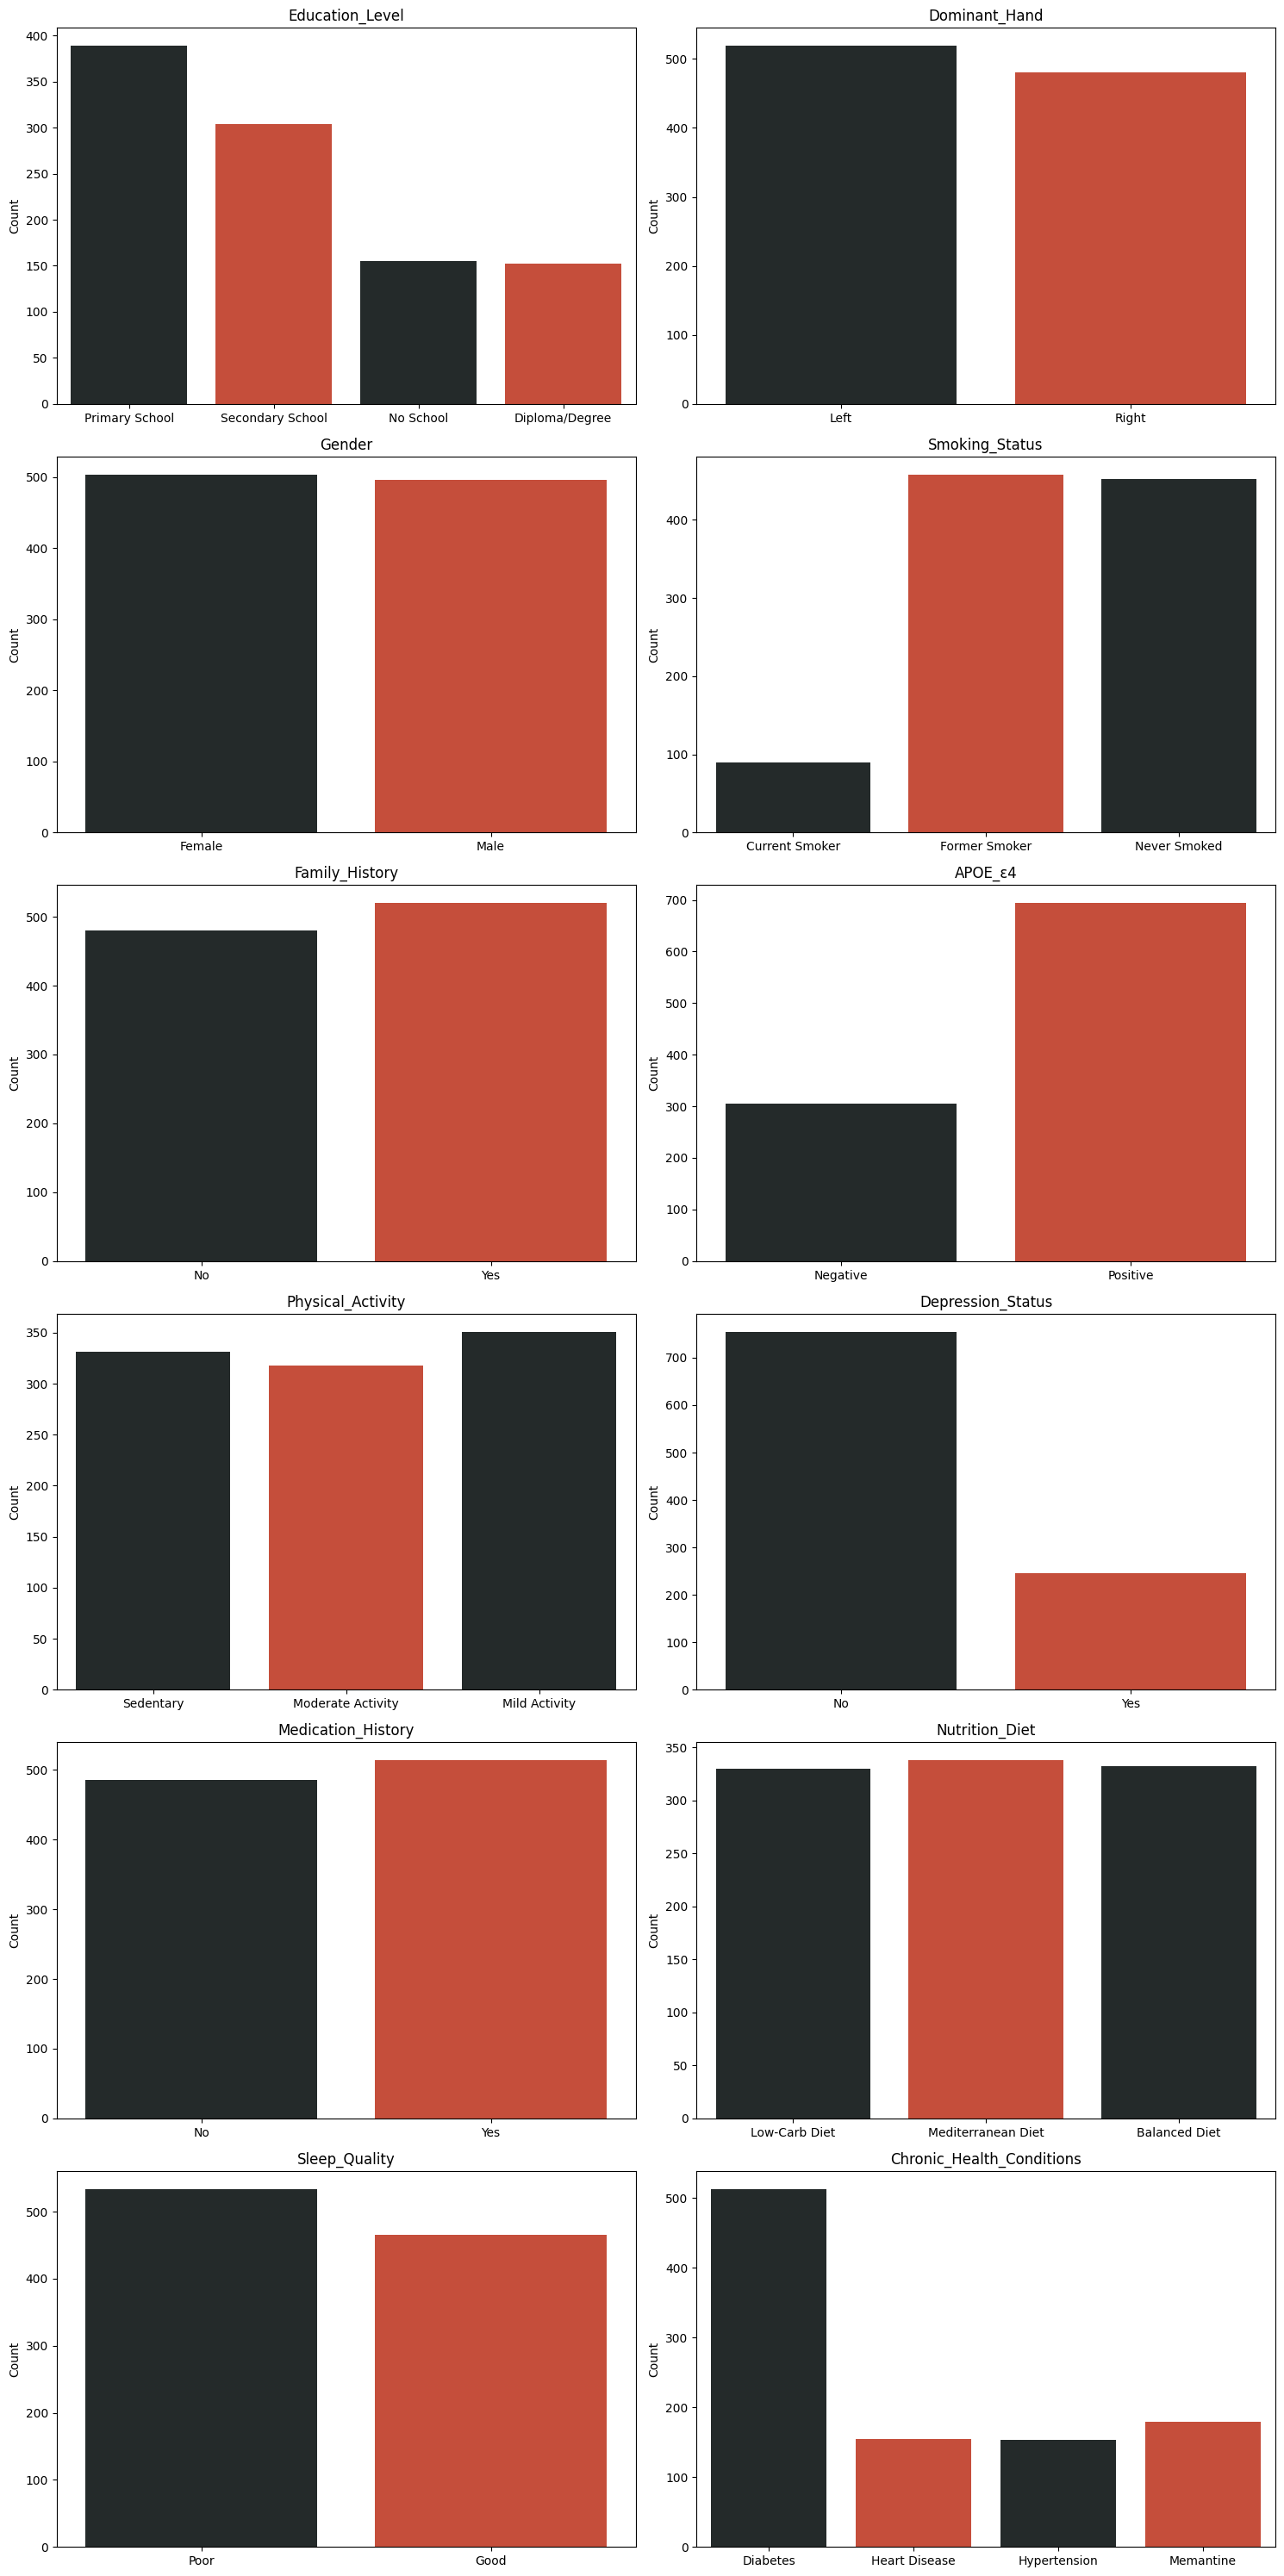

In [38]:
# 4. Bar plots for categorical variables
categorical_vars = ['Education_Level', 'Dominant_Hand', 'Gender', 'Smoking_Status', 'Family_History', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions']
plt.figure(figsize=(15, 30))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(6, 2, i)
    sns.countplot(x=var, data=df,palette=['#232b2b','#dc3d24'])
    plt.title(var)
    plt.xlabel('')
    plt.ylabel('Count')# 4. Bar plots for categorical variables
plt.tight_layout()
plt.show()

# Distribution of Dementia Patients by Age and Gender*

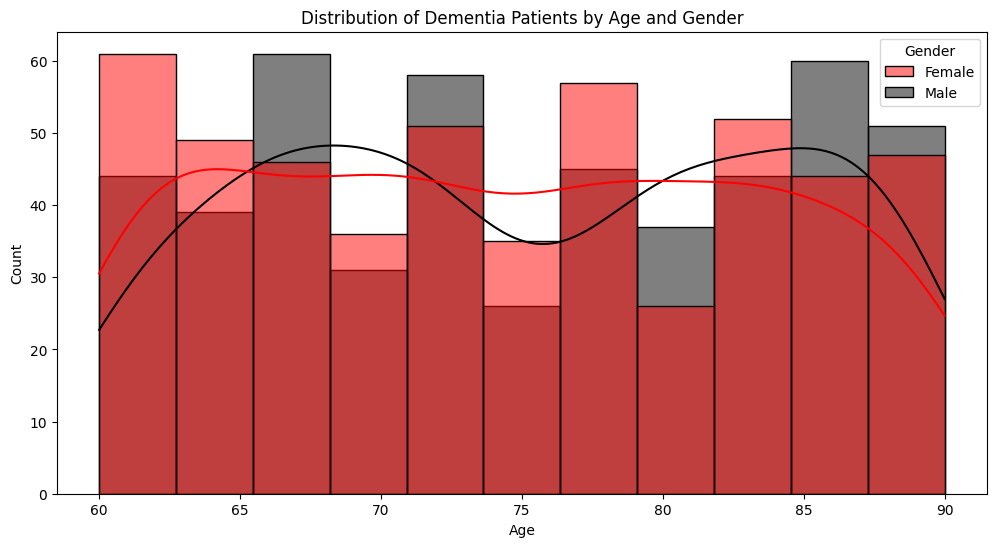

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Gender', kde=True, palette={'Male': 'black', 'Female': 'red'})
plt.title('Distribution of Dementia Patients by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Relationship between Cognitive Test Scores and Dementia

C:\Users\91877\AppData\Local\Temp\ipykernel_36744\1150615140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y='Cognitive_Test_Scores', palette=['black', 'grey'])  # Yellow shades


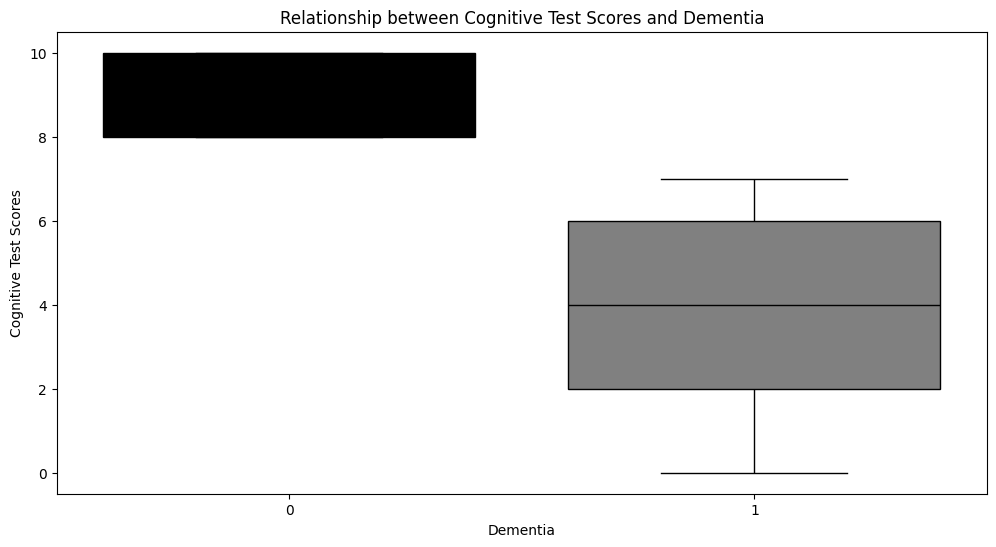

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Dementia', y='Cognitive_Test_Scores', palette=['black', 'grey'])  # Yellow shades
plt.title('Relationship between Cognitive Test Scores and Dementia')
plt.xlabel('Dementia')
plt.ylabel('Cognitive Test Scores')
plt.show()


# Prescription Dosage vs. Dementia

C:\Users\91877\AppData\Local\Temp\ipykernel_36744\215399907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Dementia', y='Dosage in mg',palette=['#232b2b'])
C:\Users\91877\AppData\Local\Temp\ipykernel_36744\215399907.py:2: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df, x='Dementia', y='Dosage in mg',palette=['#232b2b'])


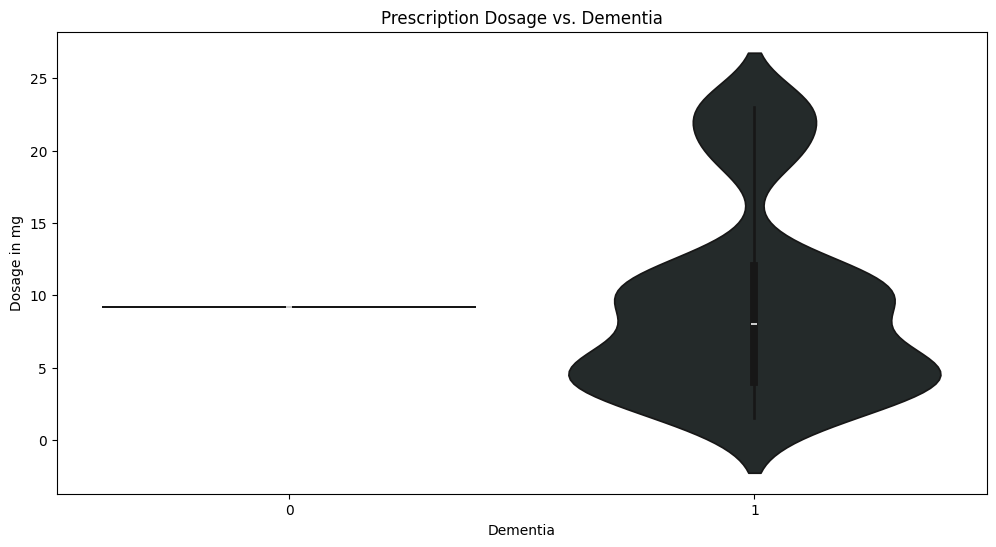

In [41]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Dementia', y='Dosage in mg',palette=['#232b2b'])
plt.title('Prescription Dosage vs. Dementia')
plt.xlabel('Dementia')
plt.ylabel('Dosage in mg')
plt.show()

# Chronic Health Conditions vs. Dementia

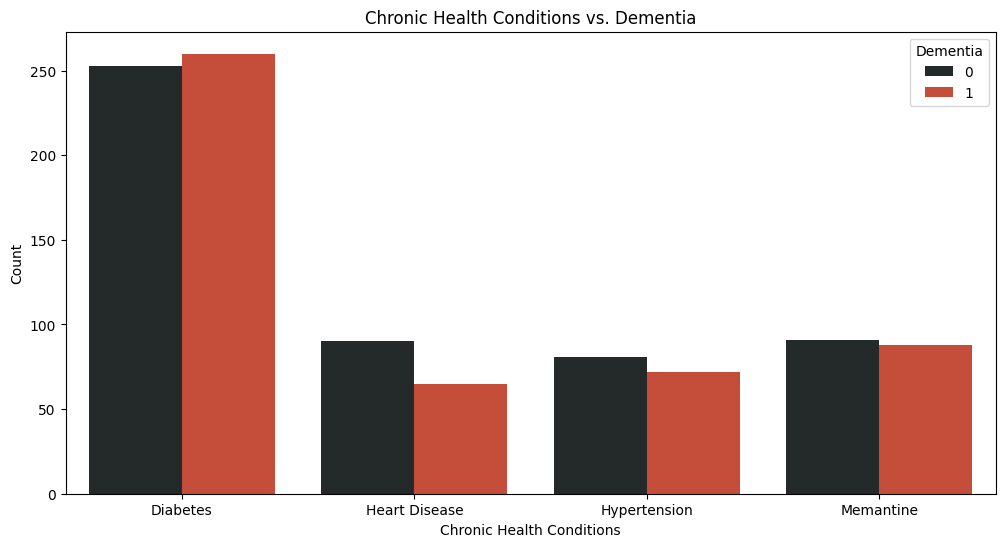

In [42]:
# Convert the columns to strings (if they are numeric)
df['Chronic_Health_Conditions'] = df['Chronic_Health_Conditions'].astype(str)
df['Dementia'] = df['Dementia'].astype(str)


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Chronic_Health_Conditions', hue='Dementia', palette=['#232b2b','#dc3d24'])
plt.title('Chronic Health Conditions vs. Dementia')
plt.xlabel('Chronic Health Conditions')
plt.ylabel('Count')
plt.show()


# 5. Histogram for 'Cognitive_Test_Scores'

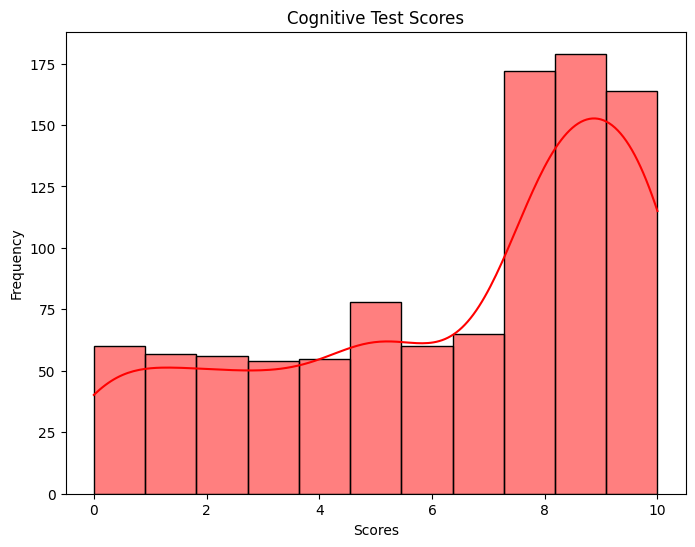

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Cognitive_Test_Scores'], kde=True, color='red')
plt.title('Cognitive Test Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()


# Converting Categorical Columns

In [44]:
data2 = df
label_encoder=preprocessing.LabelEncoder()
colToEncode = ["Prescription","Education_Level","Dominant_Hand", "Gender", "Family_History", "Smoking_Status", "APOE_ε4", "Medication_History", "Nutrition_Diet", "Sleep_Quality", "Chronic_Health_Conditions", "Physical_Activity", "Depression_Status"]
for i in colToEncode:
    data2[i] = label_encoder.fit_transform(df[i])


In [45]:
df.corr()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
Diabetic,1.000000,-0.025616,-0.007188,-0.016575,-0.053851,-0.007501,-0.020378,-0.029919,2.458726e-02,0.000923,...,0.013401,0.025953,-0.006640,0.015421,-0.050019,-0.006733,0.009586,-0.055916,-0.871307,4.481531e-02
AlcoholLevel,-0.025616,1.000000,-0.046341,-0.005562,0.030854,0.034553,0.004160,0.011165,1.564486e-02,-0.003081,...,0.016359,0.033830,0.026795,-0.002874,-0.018716,-0.058951,-0.002473,0.033801,0.066178,-3.720428e-03
HeartRate,-0.007188,-0.046341,1.000000,0.022283,0.015585,-0.001730,0.000169,-0.007336,-4.114936e-02,0.011665,...,-0.007302,0.061900,0.006472,-0.003235,0.005493,0.027799,0.049843,0.003392,0.010527,1.227590e-02
BloodOxygenLevel,-0.016575,-0.005562,0.022283,1.000000,-0.007265,-0.041081,-0.005760,0.019735,-1.615516e-02,0.029565,...,-0.028457,-0.008023,-0.057923,-0.046504,0.070218,0.015129,0.009316,0.017862,0.025110,-7.145418e-02
BodyTemperature,-0.053851,0.030854,0.015585,-0.007265,1.000000,-0.017750,0.015953,-0.041416,3.004309e-02,0.001586,...,-0.008126,0.061852,-0.005957,0.022563,-0.009791,0.022006,-0.030964,0.011410,0.052163,3.392768e-02
Weight,-0.007501,0.034553,-0.001730,-0.041081,-0.017750,1.000000,-0.022890,-0.007627,8.756674e-03,0.011739,...,-0.010713,-0.080600,0.022822,-0.032482,0.035821,-0.057993,0.023790,0.005504,0.004676,-4.956289e-02
MRI_Delay,-0.020378,0.004160,0.000169,-0.005760,0.015953,-0.022890,1.000000,0.007715,-8.315304e-02,-0.002093,...,0.019007,-0.014357,-0.025660,0.052370,-0.052227,0.038864,-0.002350,0.002877,-0.013202,3.125126e-02
Prescription,-0.029919,0.011165,-0.007336,0.019735,-0.041416,-0.007627,0.007715,1.000000,-4.616006e-01,0.001600,...,-0.060376,-0.159744,0.009613,-0.180355,0.257445,0.030580,-0.043615,0.042246,0.010122,-2.983278e-01
Dosage in mg,0.024587,0.015645,-0.041149,-0.016155,0.030043,0.008757,-0.083153,-0.461601,1.000000e+00,-0.008687,...,-0.029774,0.008248,-0.000577,-0.014043,-0.024458,-0.042105,-0.012225,0.001847,-0.022868,6.295735e-17
Age,0.000923,-0.003081,0.011665,0.029565,0.001586,0.011739,-0.002093,0.001600,-8.686705e-03,1.000000,...,-0.016421,-0.017701,0.021607,-0.018278,0.062640,-0.050559,0.085684,0.003336,0.016920,-6.215424e-02


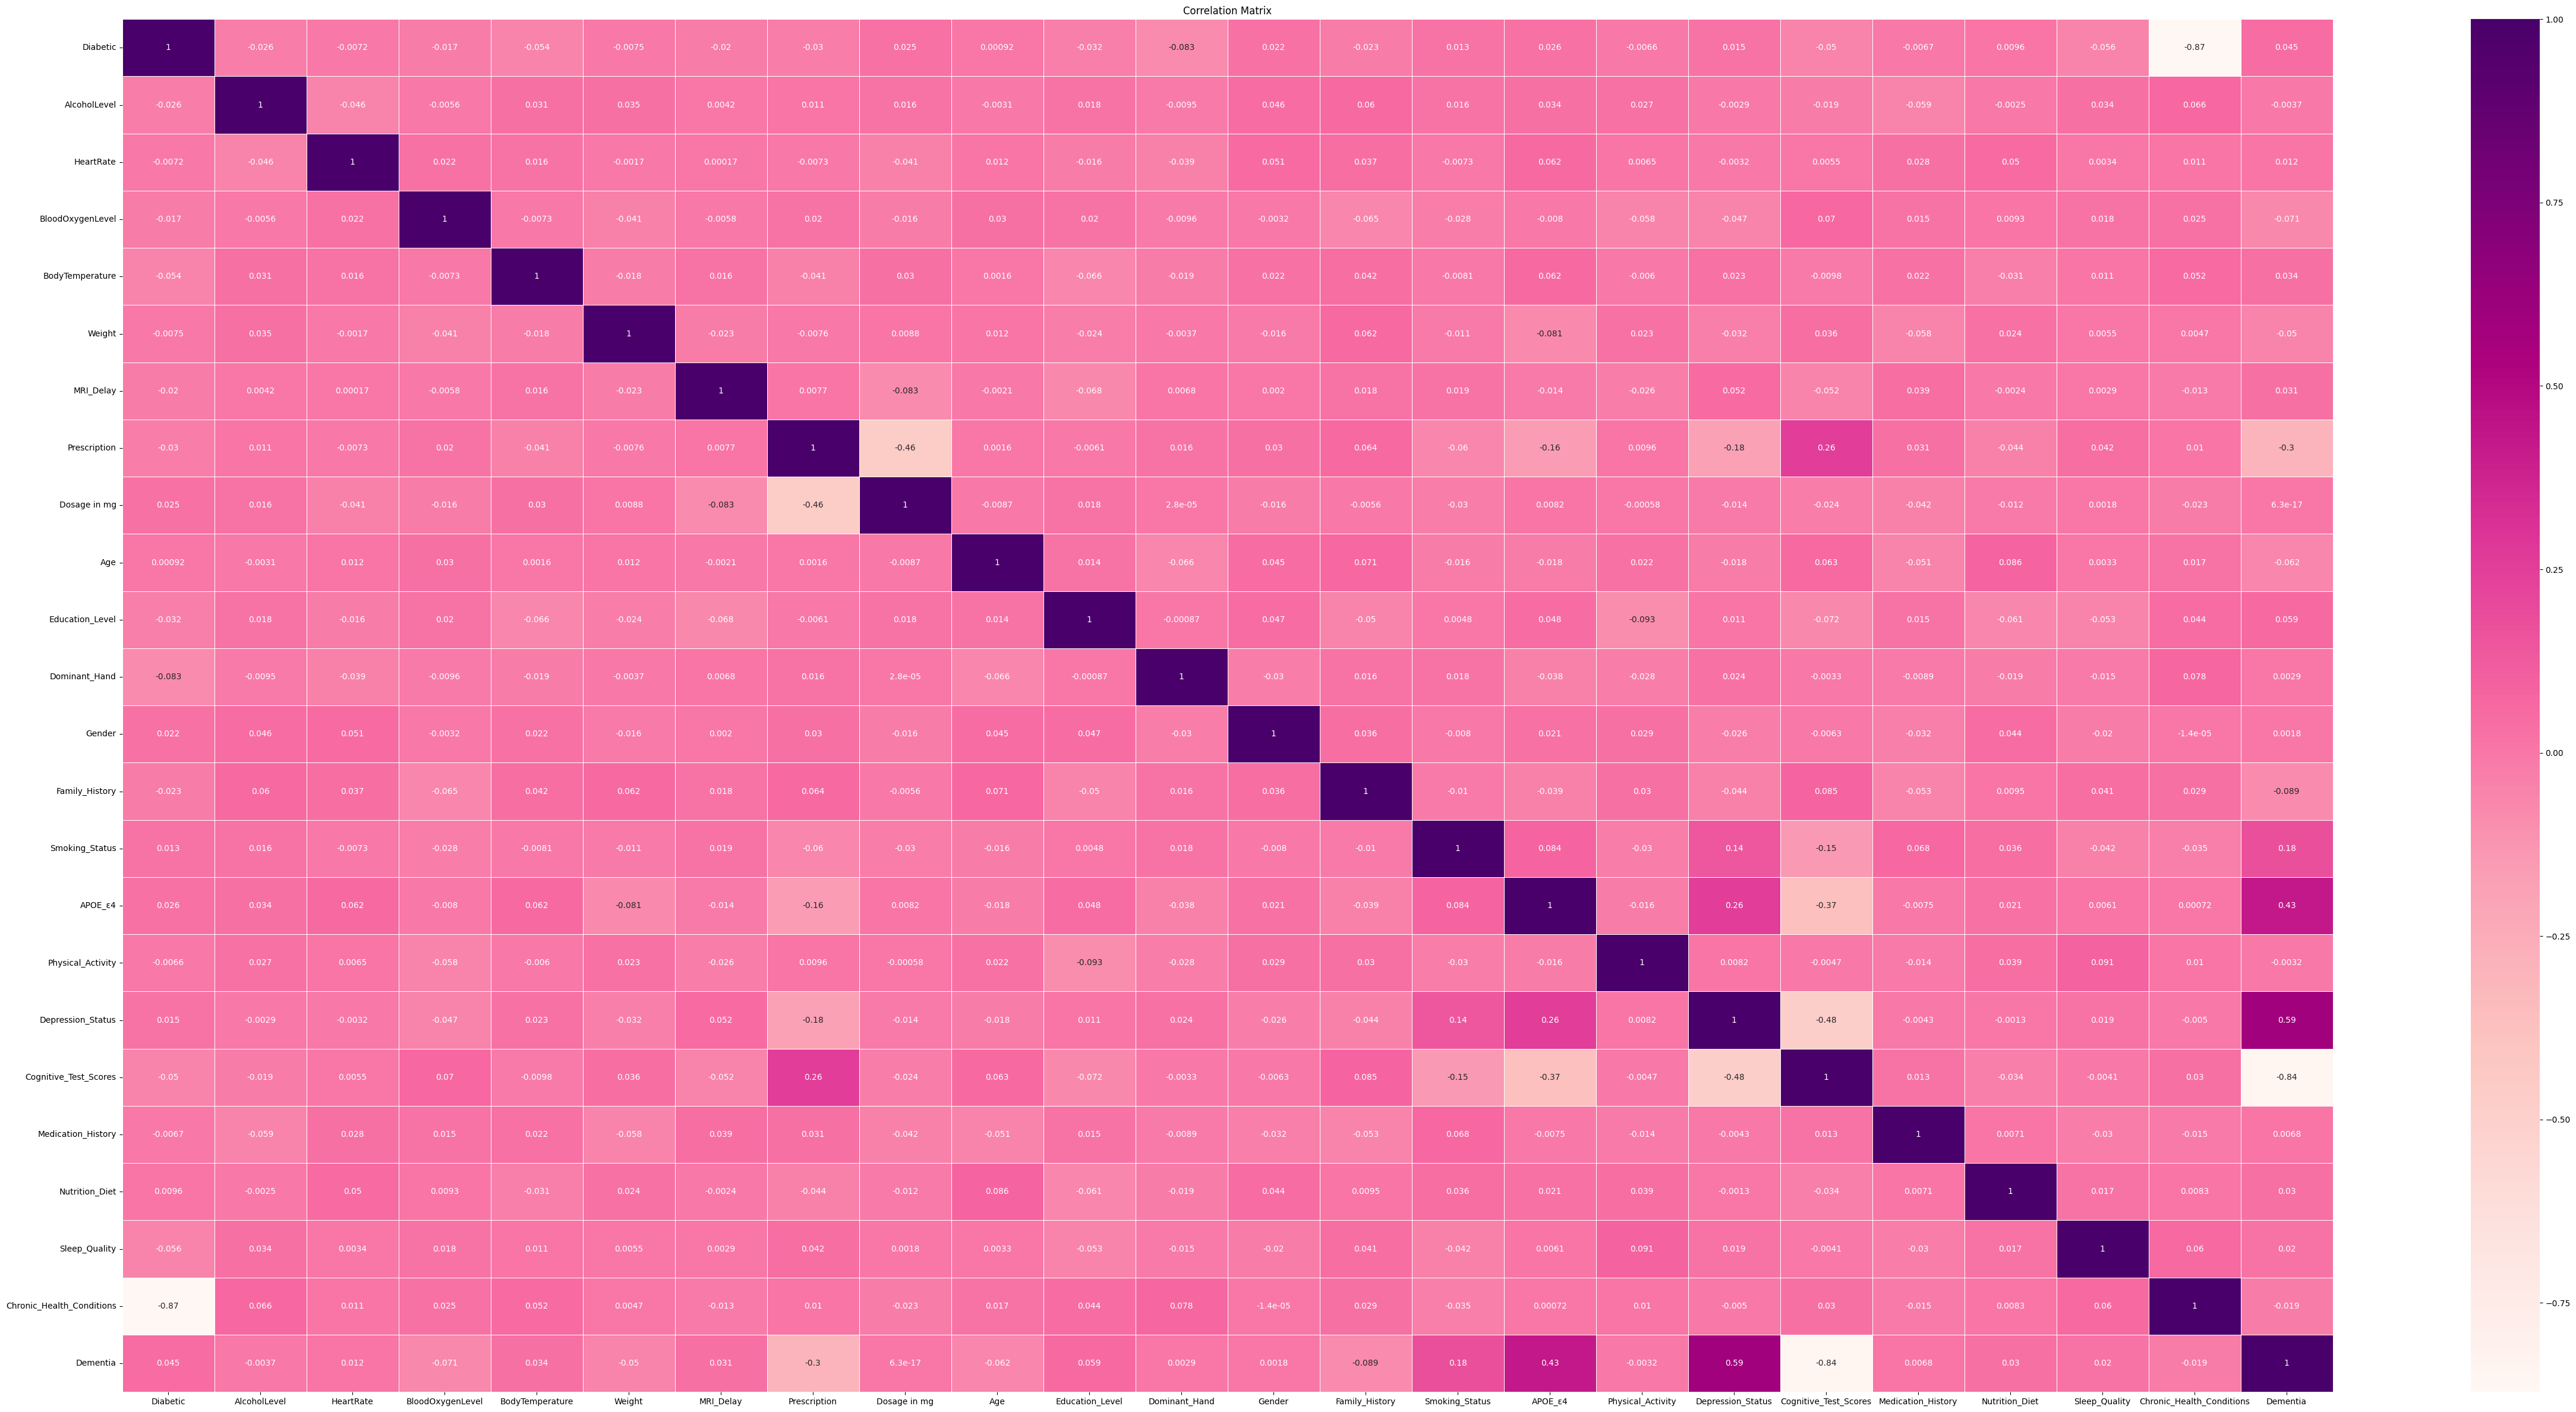

In [46]:
CorrelationMatrix=df.corr()
plt.figure(figsize=(60,30))
sns.heatmap(CorrelationMatrix, annot=True, cmap='RdPu', linewidths=.5 )
plt.title('Correlation Matrix')
plt.show()


# The correlation coefficient between "Diabetic" and "Chronic_Health_Conditions_encoded" is 0.8713072950992793, indicating a strong positive correlation.

The correlation coefficient between "Prescription" and "Prescription_encoded" is 1.0, which makes sense because "Prescription_encoded" is likely derived directly from "Prescription" and therefore perfectly correlated.

The correlation coefficient between "Cognitive_Test_Scores" and "Dementia" is 0.8432465507353851, indicating a strong positive correlation.

The correlation coefficient between "Dementia" and "Depression_Status_encoded" is 0.5870056907959509, indicating a moderate positive correlation.

Cognitive_Test_Scores and Dementia: The correlation coefficient is 0.257, indicating a moderate positive correlation. This suggests that there might be some association between cognitive test scores and dementia, but it's not very strong.

Prescription_encoded and Smoking_Status_encoded: The correlation coefficient is -0.060, indicating a weak negative correlation. There seems to be a slight negative relationship between prescription encoding and smoking status encoding.

APOE_ε4_encoded and Depression_Status_encoded: The correlation coefficient is 0.257, indicating a moderate positive correlation. This suggests that there might be some association between APOE ε4 encoding and depression status encoding.

Chronic_Health_Conditions_encoded and Chronic_Health_Conditions_encoded: The correlation coefficient is 1.000, which makes sense because it's comparing a variable to itself.

These correlation coefficients provide insights into the relationships between different variables in dataset.

In [47]:
# Features and target variable
X = df[['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 
          'Weight', 'MRI_Delay', 'Prescription', 'Dosage in mg', 'Age', 
          'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 
          'Depression_Status', 'Medication_History', 'Nutrition_Diet', 
          'Sleep_Quality', 'Chronic_Health_Conditions']]
y = df['Dementia']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Precision measures how many of the predictions made for positive cases were actually correct. In this case, both classes (0 for non-dementia and 1 for dementia) have a precision of 1.00, which means there were no false positives at all.

Recall looks at how many of the actual positive cases were correctly identified. Here, the recall for both classes is also 1.00, indicating that there were no false negatives.

The F1-score is a combined measure that considers both precision and recall. Since both precision and recall are perfect in this case, the F1-score is also 1.00 for both classes, reflecting an ideal balance.

Support tells us about the number of actual instances in each class within the dataset. We have 94 cases of class 0 (non-dementia) and 106 cases of class 1 (dementia).

When we look at the Macro Average, which averages the precision, recall, and F1-score across both classes, we again see a perfect score of 1.00, highlighting overall excellent performance.

Finally, the Weighted Average also scores 1.00, as it takes into account the number of instances for each class while calculating the averages, confirming that the model performs perfectly across the board.


In [48]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))
    print("="*50)


c:\Users\91877\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        94
           1       0.86      0.75      0.80       106

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200

Classifier: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Classifier: Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1

c:\Users\91877\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.47      1.00      0.64        94
           1       0.00      0.00      0.00       106

    accuracy                           0.47       200
   macro avg       0.23      0.50      0.32       200
weighted avg       0.22      0.47      0.30       200

Classifier: Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



c:\Users\91877\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91877\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Logistic Regression: Achieved an accuracy of 81%. Precision, recall, and F1-score for both classes (0 and 1) are provided.

Random Forest: Achieved a perfect accuracy of 100%. It performed exceptionally well on this dataset.

Gradient Boosting: Similar to Random Forest, achieved a perfect accuracy of 100%.

Support Vector Machine (SVM): Achieved an accuracy of 47%. However, the precision, recall, and F1-score for class 1 are quite low, indicating poor performance.

Naive Bayes: Achieved a perfect accuracy of 100%.

In [49]:
def predict_dementia(df):
    # Selecting features and target variable
    X = df[['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 
            'Weight', 'MRI_Delay', 'Prescription', 'Dosage in mg', 'Age', 
            'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 
            'Depression_Status', 'Medication_History', 'Nutrition_Diet', 
            'Sleep_Quality', 'Chronic_Health_Conditions']]
    y = df['Dementia']

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initializing and training the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Example usage:
# Assuming 'df' is your DataFrame containing the data
accuracy = predict_dementia(df)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Set a fixed random seed for reproducibility
np.random.seed(42)

# Sample DataFrame (generated once)
data = {
    'AlcoholLevel': np.random.rand(100),
    'HeartRate': np.random.randint(60, 100, 100),
    'BloodOxygenLevel': np.random.rand(100),
    'BodyTemperature': np.random.uniform(36.0, 37.5, 100),
    'Weight': np.random.uniform(50, 100, 100),
    'MRI_Delay': np.random.randint(0, 5, 100),
    'Prescription': np.random.randint(0, 2, 100),
    'Dosage in mg': np.random.randint(10, 100, 100),
    'Age': np.random.randint(20, 80, 100),
    'Smoking_Status': np.random.randint(0, 2, 100),
    'APOE_ε4': np.random.randint(0, 2, 100),
    'Physical_Activity': np.random.randint(0, 2, 100),
    'Depression_Status': np.random.randint(0, 2, 100),
    'Medication_History': np.random.randint(0, 2, 100),
    'Nutrition_Diet': np.random.randint(0, 2, 100),
    'Sleep_Quality': np.random.randint(0, 2, 100),
    'Chronic_Health_Conditions': np.random.randint(0, 2, 100),
    'Dementia': np.random.randint(0, 2, 100)
}

df_sample = pd.DataFrame(data)

# Check class distribution
print("Class distribution:\n", df_sample['Dementia'].value_counts())

# Split the data into features (X) and target (y)
X = df_sample.drop('Dementia', axis=1)
y = df_sample['Dementia']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Stratified Cross-Validation
skf = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(model, X_scaled, y, cv=skf)

# Calculate average accuracy
average_accuracy = np.mean(cross_val_scores)
print("Average Accuracy with Stratified Cross-Validation: {:.2f}".format(average_accuracy))


Class distribution:
 Dementia
0    50
1    50
Name: count, dtype: int64
Average Accuracy with Stratified Cross-Validation: 0.47


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

# Set a fixed random seed for reproducibility
np.random.seed(42)

# Sample DataFrame (generated once)
data = {
    'AlcoholLevel': np.random.rand(100),
    'HeartRate': np.random.randint(60, 100, 100),
    'BloodOxygenLevel': np.random.rand(100),
    'BodyTemperature': np.random.uniform(36.0, 37.5, 100),
    'Weight': np.random.uniform(50, 100, 100),
    'MRI_Delay': np.random.randint(0, 5, 100),
    'Prescription': np.random.randint(0, 2, 100),
    'Dosage in mg': np.random.randint(10, 100, 100),
    'Age': np.random.randint(20, 80, 100),
    'Smoking_Status': np.random.randint(0, 2, 100),
    'APOE_ε4': np.random.randint(0, 2, 100),
    'Physical_Activity': np.random.randint(0, 2, 100),
    'Depression_Status': np.random.randint(0, 2, 100),
    'Medication_History': np.random.randint(0, 2, 100),
    'Nutrition_Diet': np.random.randint(0, 2, 100),
    'Sleep_Quality': np.random.randint(0, 2, 100),
    'Chronic_Health_Conditions': np.random.randint(0, 2, 100),
    'Dementia': np.random.randint(0, 2, 100)
}

df_sample = pd.DataFrame(data)

# Check class distribution
print("Class distribution:\n", df_sample['Dementia'].value_counts())

# Split the data into features (X) and target (y)
X = df_sample.drop('Dementia', axis=1)
y = df_sample['Dementia']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Set hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Increasing the number of trees
    'max_depth': [None, 10, 20],      # Limiting tree depth
    'min_samples_split': [2, 5, 10],  # Min samples for splitting nodes
    'min_samples_leaf': [1, 2, 4],    # Min samples for leaf nodes
    'class_weight': ['balanced']      # Handling class imbalance
}

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Stratified Cross-Validation with the best model
skf = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(best_model, X_scaled, y, cv=skf)

# Calculate average accuracy
average_accuracy = np.mean(cross_val_scores)
print("Average Accuracy after Hyperparameter Tuning: {:.2f}".format(average_accuracy))

# Best Parameters
print("Best Parameters:", grid_search.best_params_)


Class distribution:
 Dementia
0    50
1    50
Name: count, dtype: int64
Average Accuracy after Hyperparameter Tuning: 0.55
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE  # For oversampling the minority class
import os

# Silencing Joblib warning by setting logical cores manually
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Adjust to the number of cores available

# Set a fixed random seed for reproducibility
np.random.seed(42)

# Load dataset from the specified path
dataset_path = 'C:/Users/91877/Downloads/archive (6)/preprocessed_dataset(1).csv'
df_sample = pd.read_csv(dataset_path)

# Check class distribution to understand imbalance
print("Class distribution:\n", df_sample['Dementia'].value_counts())

# Split the data into features (X) and target (y)
X = df_sample.drop('Dementia', axis=1)
y = df_sample['Dementia']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Initialize Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Set hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],  # Try a higher number of trees
    'max_depth': [None, 10, 20, 30],        # Experiment with deeper trees
    'min_samples_split': [2, 5, 10],        # Min samples for splitting nodes
    'min_samples_leaf': [1, 2, 4],          # Min samples for leaf nodes
    'max_features': ['sqrt', 'log2'],       # Use sqrt/log2 for feature selection
    'class_weight': ['balanced']            # Handling class imbalance
}

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Stratified Cross-Validation with the best model
skf = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=skf)

# Calculate average accuracy
average_accuracy = np.mean(cross_val_scores)
print("Average Accuracy after Hyperparameter Tuning: {:.2f}".format(average_accuracy))

# Display the best hyperparameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Class distribution:
 Dementia
0    515
1    485
Name: count, dtype: int64


In [ ]:
df_sample

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,2,9.213402,60,...,0,0,2,0,10,0,1,1,0,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,1,12.000000,61,...,1,1,1,0,1,1,1,1,1,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,2,9.213402,69,...,1,0,1,0,8,0,2,1,1,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,0,23.000000,78,...,2,0,0,1,5,1,0,1,2,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,2,20.000000,77,...,2,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,0,10.000000,88,...,2,1,0,0,5,0,0,1,0,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,2,9.213402,80,...,2,0,1,0,9,1,1,1,0,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,2,9.213402,67,...,2,1,2,0,8,1,0,0,0,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,2,20.000000,62,...,2,1,2,1,2,0,1,0,3,1


In [ ]:
import joblib

# Assuming `best_model` is your trained model from GridSearchCV
joblib.dump(best_model, 'dementia_model.pkl')


['dementia_model.pkl']

In [ ]:
import joblib
import numpy as np

# Load the pre-trained model (ensure the path is correct)
model = joblib.load('dementia_model.pkl')

# Input features (replace with actual values from your dataset)
input_features = [
    1,      # Diabetic
    0.085,  # Alcohol Level
    98,     # Heart Rate
    96.2,   # Blood Oxygen Level
    36.2,   # Body Temperature
    57.5,   # Weight (kg)
    36.4,   # MRI Delay (in seconds)
    2,      # Prescription (0, 1, or 2)
    9.21,   # Dosage in mg
    60,     # Age
    0,      # Smoking Status (0 or 1)
    0,      # APOE ε4 (0 or 1)
    2,      # Physical Activity (0, 1, or 2)
    0,      # Depression Status (0 or 1)
    10,     # Cognitive Test Scores
    0,      # Medication History (0 or 1)
    1,      # Nutrition Diet (0 or 1)
    1,      # Sleep Quality (0 or 1)
    0,      # Chronic Health Conditions (0 or 1)
    5,      # Feature 21 (example, replace with actual feature)
    7,      # Feature 22 (example, replace with actual feature)
    3,
    1      # Feature 23 (example, replace with actual feature)
]

# Convert the input features into a NumPy array (reshape for model input)
input_array = np.array([input_features])

# Make the prediction
prediction = model.predict(input_array)
print(prediction)

# Map the prediction result to an interpretable output
output = 'Dementia Detected' if prediction[0] == 1 else 'No Dementia'

# Print the prediction result
print(output)



[1]
Dementia Detected
